In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

### Import the data

In [4]:
data = np.genfromtxt('MDA2_data/mda4_data.txt')

In [5]:
data

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [12]:
np.unique(data[0],return_counts = True)

(array([0., 1.]), array([32555, 32981]))

### Fuctions functions functions 

In [218]:
def entropy(samples, axis = 0):
    x, counts = np.unique(samples, axis = axis, return_counts = True)
    freqs = counts / sum(counts)
    return (- sum(freqs*np.log2(freqs)))

In [97]:
def direct_mi(sample, fractions, plot = False):
    x = np.around(len(sample)*fractions)
    curr_mi = np.empty(len(fractions))
    for i,f in enumerate(fractions):
        curr_mi[i] = MI(sample[:int(np.around(len(sample)*f))])
    k,b = np.polyfit(1/x, curr_mi, 1)
    if plot:
        plt.plot(1/x, curr_mi, label = 'naive')
        plt.plot(1/x, k/x+b, label = 'linear fit')
        plt.legend()
        plt.xlim(0)
    return b

In [178]:
def MI(sample):
    S_all = entropy(sample, axis = 1)
    S_sep = 0
    for n in range(sample.shape[0]):
        S_sep += entropy(sample[n])
    mi = S_sep - S_all
    return mi

### All pairs: boring

In [221]:
fraction = np.array([1/x for x in np.arange(1,4,0.2)])
dir_mi = np.empty((6,6))
cors = np.empty((6,6))
entr = np.empty((6,6))
for i in range(6):
    for j in range(6):
        joint = data[[i,j]]
        entr[i][j] = entropy(joint, axis = 1)
        dir_mi[i][j] = direct_mi(joint, fractions = fraction)
        cors[i][j] = stats.pearsonr(data[i],data[j])[0]

(-0.01, 0.015)

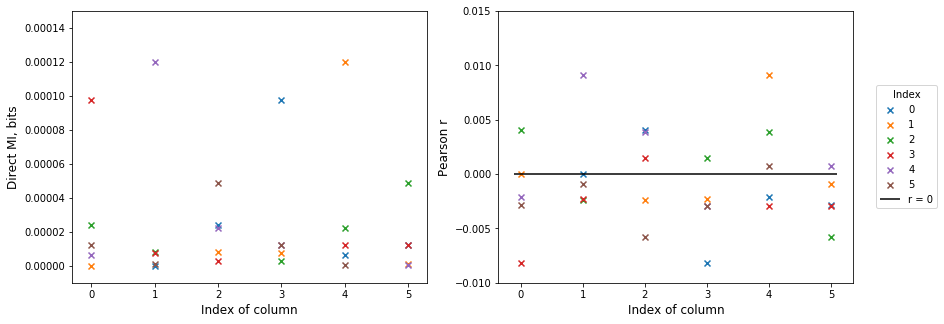

In [334]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
for i in range(6):
    index = list(range(6))
    index.pop(i)
    ax[0].scatter(index,dir_mi[i, index], label = '{}'.format(i), marker = 'x')
    ax[1].scatter(index,cors[i, index], label = '{}'.format(i), marker = 'x')
    
ax[0].set_ylabel('Direct MI, bits', fontsize = 12)
ax[0].set_xlabel('Index of column', fontsize = 12)
ax[1].hlines(0, -0.1, 5.1, label = 'r = 0')
ax[1].set_ylabel('Pearson r', fontsize = 12)
ax[1].set_xlabel('Index of column', fontsize = 12)
ax[1].legend(title = 'Index', bbox_to_anchor=(1.15, 0.5),loc = 'center')
ax[0].set_ylim(-0.00001, 0.00015)
ax[1].set_ylim(-0.01,0.015)

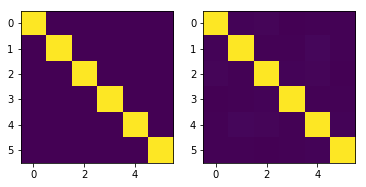

In [227]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(dir_mi)
ax[1].imshow(cors)
#ax[2].imshow(entr)

### All triplets

In [314]:
fraction = np.array([1/x for x in np.arange(1,4,0.2)])
pos_triplets = list(combinations([0,1,2,3,4,5], 3))
dir_mi_3 = np.empty(len(pos_triplets))
entr_3 = np.empty(len(pos_triplets))
for i, trip in enumerate(pos_triplets):
    stack = data[list(trip)]
    dir_mi_3[i] = direct_mi(stack, fractions = fraction)
    entr_3[i] = entropy(stack, axis = 1)

In [315]:
pos_triplets

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

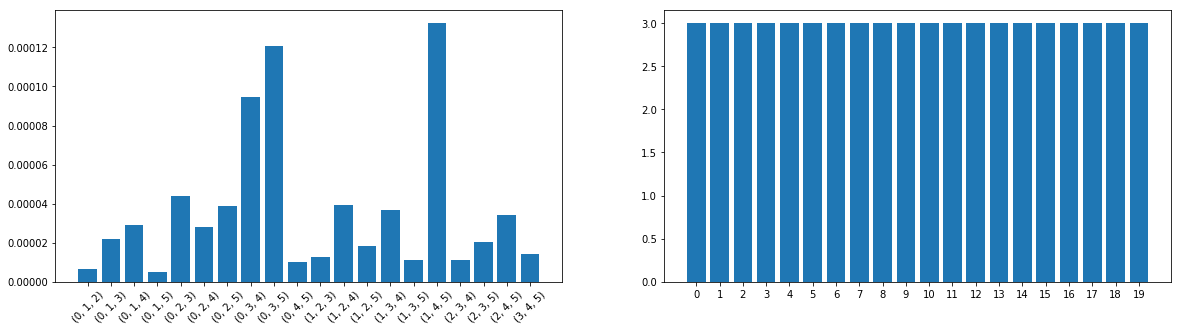

In [317]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].bar(range(len(dir_mi_3)),dir_mi_3)
ax[1].bar(range(len(entr_3)),entr_3)
ax[0].set_xticks(range(len(entr_3)))
ax[0].set_xticklabels(labels = pos_triplets, rotation=45, minor = False)
ax[1].set_xticks(range(len(entr_3)))
#ax[1].set_ylim(1.4,1.6)

Text(0.5, 0, 'Triplets')

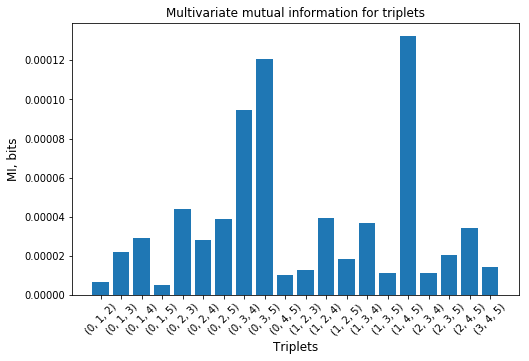

In [323]:
plt.figure(figsize = (8,5))
plt.bar(range(len(dir_mi_3)),dir_mi_3)
plt.xticks(range(len(entr_3)),labels = pos_triplets, rotation=45)
plt.title('Multivariate mutual information for triplets',fontsize = 12)
plt.ylabel('MI, bits', fontsize = 12)
plt.xlabel('Triplets',fontsize = 12)

In [196]:
print(pos_triplets[7])
print(pos_triplets[8])
print(pos_triplets[15])

(0, 3, 4)
(0, 3, 5)
(1, 4, 5)


### All quadruplets

In [303]:
fraction = np.array([1/x for x in np.arange(1,4,0.2)])
pos_4 = list(combinations([0,1,2,3,4,5], 4))
dir_mi_4 = np.empty(len(pos_4))
entr_4 = np.empty(len(pos_4))
for i, four in enumerate(pos_4):
    stack = data[list(four)]
    dir_mi_4[i] = direct_mi(stack, fractions = fraction)
    entr_4[i] = entropy(stack, axis = 1)

In [304]:
pos_4

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 4, 5),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 4, 5),
 (0, 3, 4, 5),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 4, 5),
 (1, 3, 4, 5),
 (2, 3, 4, 5)]

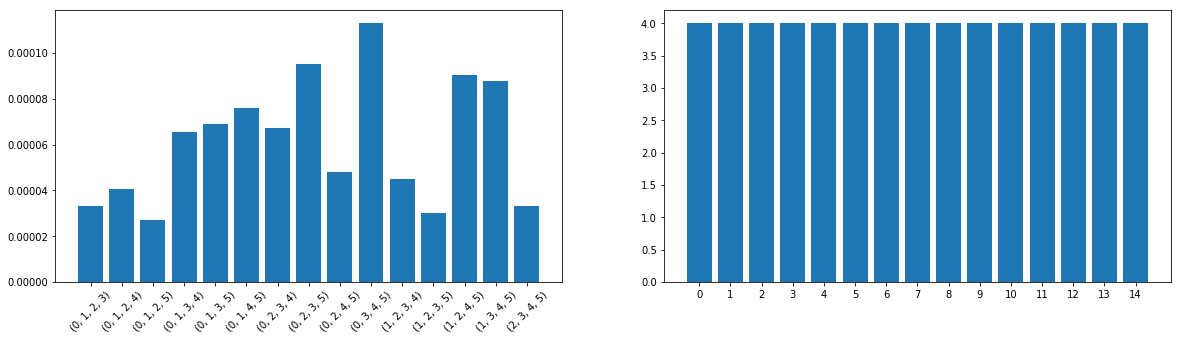

In [313]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].bar(range(len(dir_mi_4)),dir_mi_4)
ax[1].bar(range(len(entr_4)),entr_4)
ax[0].set_xticks(range(len(entr_4)))
ax[0].set_xticklabels(labels = pos_4, rotation=45, minor = False)
ax[1].set_xticks(range(len(entr_4)))

Text(0.5, 0, 'Quadruplets')

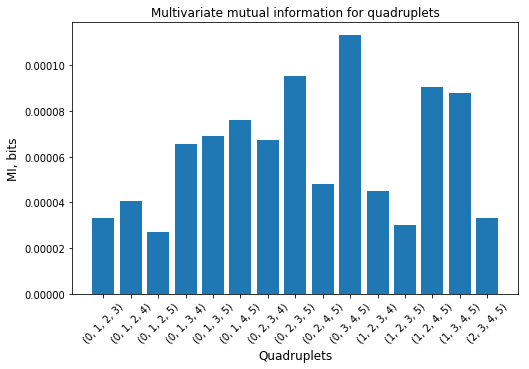

In [328]:
plt.figure(figsize = (8,5))
plt.bar(range(len(dir_mi_4)),dir_mi_4)
plt.xticks(range(len(entr_4)),labels = pos_4, rotation=45)
plt.title('Multivariate mutual information for quadruplets',fontsize = 12)
plt.ylabel('MI, bits', fontsize = 12)
plt.xlabel('Quadruplets',fontsize = 12)

#### Quintets

In [297]:
fraction = np.array([1/x for x in np.arange(1,4,0.2)])
pos_5 = list(combinations([0,1,2,3,4,5], 5))
dir_mi_5 = np.empty(len(pos_5))
entr_5 = np.empty(len(pos_5))
for i, five in enumerate(pos_5):
    stack = data[list(five)]
    dir_mi_5[i] = direct_mi(stack, fractions = fraction)
    entr_5[i] = entropy(stack, axis = 1)

In [298]:
pos_5

[(0, 1, 2, 3, 4),
 (0, 1, 2, 3, 5),
 (0, 1, 2, 4, 5),
 (0, 1, 3, 4, 5),
 (0, 2, 3, 4, 5),
 (1, 2, 3, 4, 5)]

In [309]:
dir_mi_5

array([9.41287428e-05, 9.70616215e-05, 1.06505226e-04, 2.20595061e-01,
       1.21774409e-04, 1.13282197e-04])

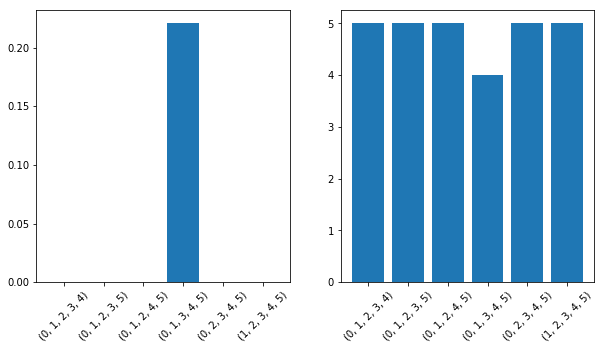

In [311]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].bar(range(len(dir_mi_5)),dir_mi_5)
ax[1].bar(range(len(entr_5)),entr_5)
ax[0].set_xticks(range(len(entr_5)))
ax[0].set_xticklabels(labels = pos_5, rotation=45, minor = False)
ax[1].set_xticklabels(labels = pos_5, rotation=45, minor = False)
ax[1].set_xticks(range(len(entr_5)))
# ax[0].set_ylim(0,0.0005)

Text(0.5, 0, 'Quintets')

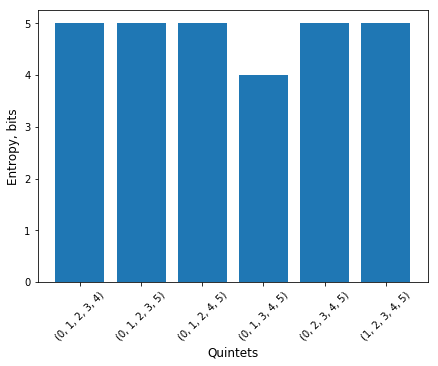

In [391]:
plt.figure(figsize = (7,5))
plt.bar(range(len(entr_5)),entr_5)
plt.xticks(range(len(entr_5)),labels = pos_5, rotation=45)
#plt.title('Direct entropy for quintets',fontsize = 12)
plt.ylabel('Entropy, bits', fontsize = 12)
plt.xlabel('Quintets',fontsize = 12)

In [370]:
two = np.array([1,2,4,8,16])
dep5 = data[list(pos_5[3])]
translated = np.empty(dep5.shape[1])
for i in range(dep5.shape[1]):
    f = dep5[:,i]
    translated[i] = sum(two*f)

In [384]:
np.unique(translated)

array([ 1.,  2.,  4.,  7.,  8., 11., 13., 14., 16., 19., 21., 22., 25.,
       26., 28., 31.])

Text(0, 0.5, 'Count')

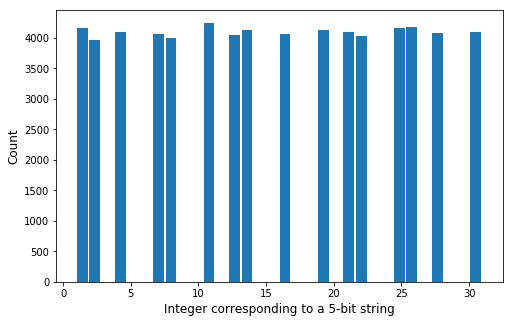

In [389]:
plt.figure(figsize = (8,5))
plt.hist(translated, bins = 32, width=0.8)
plt.xlabel('Integer corresponding to a 5-bit string', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
#plt.xticks(range(31))